In [3]:
import skrf as rf
from math import pi
from skrf.media.cpw import CPW
import pandas as pd
import numpy as np
from modeling.utils.resonators import cpw_capacitance_inductance, get_equivalent_lc, loaded_quarter_wave_notch_resonator_kappa
from modeling.utils.network import assemble_network

In [98]:
fl_traits = pd.read_csv("single_clockmons_readout_structure.csv").values[0][1:]
# tee_params = 
# res_length = 
a = 10e-6  # Center conductor width (m)
b = 6e-6  # Gap between center conductor and ground planes (m)
l = 7.500e-3 # Length of the CPW resonator (m)
epsilon_r = 11.9  # Relative permittivity of the substrate
Z0 = CPW(w = 10e-6, s = 6e-6, ep_r = 11.9).z0[0].real

capacitance, inductance = cpw_capacitance_inductance(a, b, l, epsilon_r)
c_r, l_r = get_equivalent_lc(capacitance, inductance, l, Z0)
expected_frequency = 1/np.sqrt(c_r*l_r) / 2/np.pi
print(f"Expected frequency: {expected_frequency/1e9} GHz")

Expected frequency: 7.869627804267277 GHz


In [122]:
options = {
    "qubit_c": [90, 90, 90, 90],
    "qubit_l": [14e-9]*4,
    "readout_resonator_c": [c_r, c_r + 4e-12, c_r + 4e-12, c_r + 4e-12],
    "readout_resonator_l": [l_r, l_r + 4e-10, l_r + 4e-10, l_r + 4e-10],
    "ck": [1e-14]*4,
    "cqr": [1e-14]*4,
    "feedline_traits": fl_traits,
    "frequency": [7.577, 7.583],
    "n_points": 1001
}

2-Port Network: '',  7.577-7.583 GHz, 1001 pts, z0=[50.+0.j 50.+0.j]


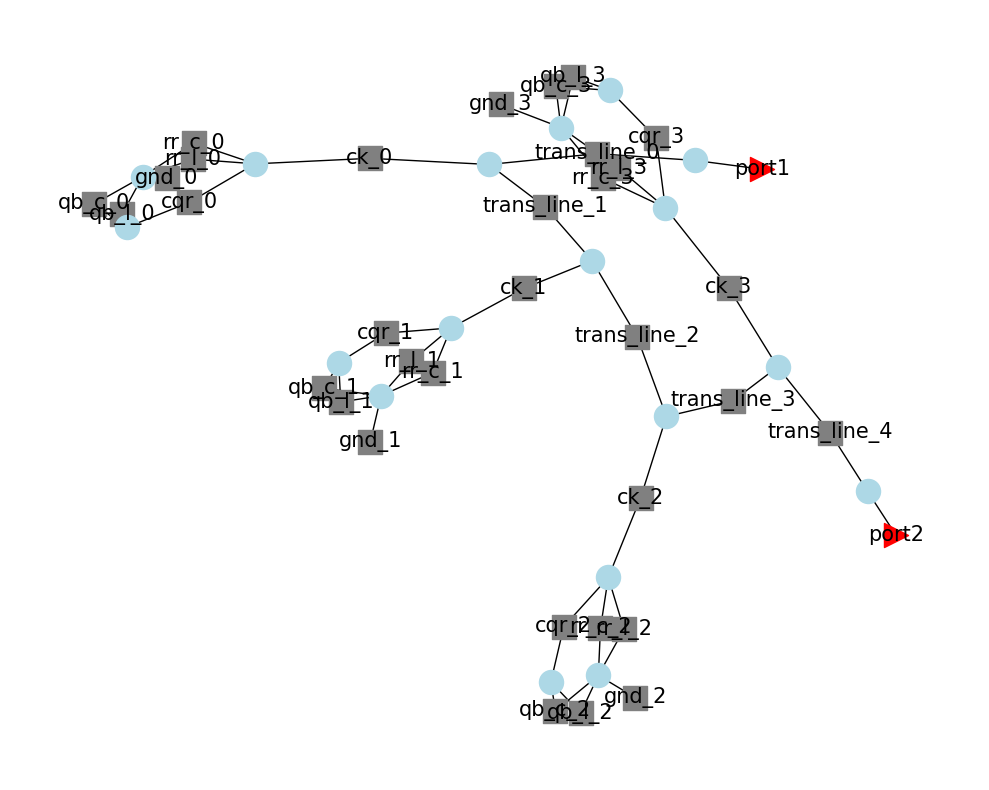

In [123]:
cnx = assemble_network(options)
cir = rf.Circuit(cnx)

cir.plot_graph(network_labels=True, network_fontsize=15,
               port_labels=True, port_fontsize=15,
               edge_fontsize=10)

# Get the resulting Network from the 'network' parameter:
ntw = cir.network
print(ntw)

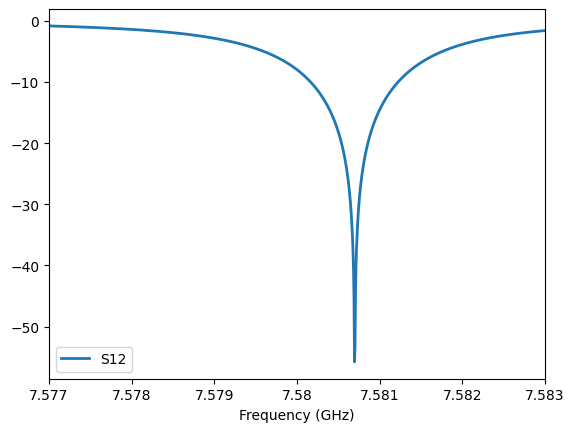

In [125]:
ntw.plot_s_db(m=0, n=1, lw=2)

In [9]:
from qdast.modeling.utils.resonators import cpw_with_ground
# def cpw_with_ground(eps_r: float, trace_width: float, gap_width: float, substrate_height: float = inf,
#                     chip_distance: float = inf, Lk: float = 0.0):